<a href="https://colab.research.google.com/github/Ananya-22/CAMS/blob/main/Basic_code%2B5_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing and installation

In [59]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-03 19:55:58.881166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 19:56:01.904167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.loa

In [60]:
#installing tweet-preprocessor
!pip install tweet-preprocessor

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
pip install top2vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Dataset upload

In [125]:
df = pd.read_csv('sentiment_tweets3.csv')
df.columns

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')

In [126]:
df=df.drop(['Index'],axis=1)
df.rename(columns = {'message to examine':'original_tweets'}, inplace = True)
# df.rename(columns = {'label (depression result)':'label'}, inplace = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [127]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,original_tweets,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


#Data cleaning

In [128]:
slang_abbrev_dict = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'B4N': 'Bye For Now',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What It\'s Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you',
    'ILU': 'I Love You',
    'IMHO': 'In My Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My Ass Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'OMG': 'Oh My God',
    'PITA': 'Pain In The Ass',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My Ass Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait',
    '7K': 'Sick:-D Laugher'
}

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [129]:
# spell = SpellChecker()

# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [130]:
# def remove_emoji(text):
#     """
#     Removes emoji's from tweets
#     Accepts:
#         Text (tweets)
#     Returns:
#         Text (emoji free tweets)
#     """
#     emoji_list = [c for c in text if c in emoji_data.unicode_emoji]
#     clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
#     return clean_text

def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def url_free_text(text):    
    # Cleans text from urls
    text = re.sub(r'http\S+', '', text)
    return text

def username_free_text(text):
    # remove @username from tweets
    text = re.sub('@[\w]+','',text)
    # remove hashtags
    text = re.sub(r'#\w+ ?', '', text)
    # #remove reserved word such as RT,FAV
    # text= p.OPT.RESERVED(text)
    return text

def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n't", " not", phrase) 
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


def unslang(text):
    # Converts text like "OMG" into "Oh my God"
  
    if text.upper() in slang_abbrev_dict.keys():
        return slang_abbrev_dict[text.upper()]
    else:
        return text

def remove_punc(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)

    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    
    # substitute multiple whitespace with single whitespace Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace
    

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: remove_emoji(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
df['emoji_free_tweets'] = df['original_tweets'].apply(remove_emoji)
df['original_tweets'] = df['emoji_free_tweets'].astype(str)

#Create a new column with url free tweets
df['url_free_tweets'] = df['original_tweets'].apply(url_free_text)

#Create a new column with username free tweets
df['username_free_tweets'] = df['url_free_tweets'].apply(username_free_text)

#Create a new column with removing can't with cannot tweets
df['slang_free_tweets'] = df['username_free_tweets'].apply(decontracted)

#Create a new column  removing OMG with oh my god tweets
df['slang_free_tweets'] = df['slang_free_tweets'].apply(unslang)

#Create a new column with no pun
df['punc_free_tweets'] = df['slang_free_tweets'].apply(remove_punc)




/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:34: DeprecationWarning:

invalid escape sequence \w

<>:71: DeprecationWarning:

invalid escape sequence \s

<>:34: DeprecationWarning:

invalid escape sequence \w

<>:71: DeprecationWarning:

invalid escape sequence \s

<ipython-input-130-8dce7b2b5bb6>:34: DeprecationWarning:

invalid escape sequence \w

<ipython-input-130-8dce7b2b5bb6>:71: DeprecationWarning:

invalid escape sequence \s



In [131]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,original_tweets,label (depression result),emoji_free_tweets,url_free_tweets,username_free_tweets,slang_free_tweets,punc_free_tweets
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,-,
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,Need to send 'em to my accountant tomorrow. O...,Need to send 'em to my accountant tomorrow. O...,need to send em to my accountant tomorrow oddl...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me on myspace myspacecomlookthunder


#Bert topic

In [108]:
pip install bertopic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=8d151ac95aee41af71b4727fe761e8c2ecb5aef258c130940fd2b06e8445495b
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [132]:
from bertopic import BERTopic

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



label1

In [149]:
df1.count()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



original_tweets              2314
label (depression result)    2314
emoji_free_tweets            2314
url_free_tweets              2314
username_free_tweets         2314
slang_free_tweets            2314
punc_free_tweets             2314
dtype: int64

In [139]:
docs=df1.punc_free_tweets.tolist()
docs[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'the lack of this understanding is a small but significant part of what causes anxiety depression to both feel so incredibly lonely it is soooo easy to compare it is so easy to invalidate ourselves because of that'

In [140]:
len(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2314

In [141]:
topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [142]:
topics,probs = topic_model.fit_transform(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [143]:
topic_model.get_topic_info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name
0,-1,844,-1_to_the_depression_and
1,0,180,0_emoji_face_smiling_with
2,1,121,1_depression_my_anxiety_and
3,2,82,2_exercise_risk_exercising_cuts
4,3,81,3_music_video_listen_playlist
5,4,55,4_her_she_bom_ë²
6,5,48,5_food_weight_eating_eat
7,6,47,6_cure_for_methods_effective
8,7,41,7_great_the_recession_federal
9,8,41,8_nap_naps_sleep_bed


In [144]:
topic_model.get_topic(0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('emoji', 0.0687330642428403),
 ('face', 0.05813680463011468),
 ('smiling', 0.02798260374556315),
 ('with', 0.025503878722940777),
 ('faceemoji', 0.025454798952655122),
 ('crying', 0.02347578177271829),
 ('skin', 0.020672609055001748),
 ('loudly', 0.020397712778740983),
 ('tears', 0.0161051919664698),
 ('red', 0.01596241334153093)]

In [145]:
topic_model.get_representative_docs(0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['the depression hotline is outta service emoji face with tears of joyemoji smiling face with open mouth and cold sweatemoji weary faceemoji woman shrugging medium skin toneemoji face with rolling eyesemoji hugging face',
 'emoji sunflower intimidating but madaldal emoji cat face with tears of joyemoji yellow heart mga ganon emoji rolling on the floor laughingemoji honey pot do not let depression get into u and always look at the brighter side of life emoji smiling face with smiling eyes stay strong with eya emoji two hearts tca and gbu emoji call me hand medium light skin tone',
 'it had only been like weeks when you wrote this emoji face with tears of joy post concert depression am i right emoji loudly crying face']

In [146]:
bertdf=pd.DataFrame({"topic":topics , "document":docs})
bertdf

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,topic,document
0,-1,the lack of this understanding is a small but ...
1,-1,i just told my parents about my depression and...
2,13,depression is something i do not speak about e...
3,5,made myself a tortilla filled with pbj my depr...
4,0,i am gonna need depression meds soon these rai...
...,...,...
2309,1,no depression by g herbo is my mood from now o...
2310,6,what do you do when depression succumbs the br...
2311,-1,ketamine nasal spray shows promise against dep...
2312,34,dont mistake a bad day with depression everyon...


In [147]:
topic_model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [148]:
topic_model.visualize_barchart()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



label0

In [152]:
docs_0=df0.punc_free_tweets.tolist()
docs_0[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'just had a real good moment i missssssssss him so much'

In [153]:
topic_model = BERTopic(embedding_model='all-MiniLM-L6-v2')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [155]:
topics,probs = topic_model.fit_transform(docs_0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [156]:
topic_model.get_topic_info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name
0,-1,3343,-1_the_you_to_and
1,0,469,0_food_coffee_drinking_eat
2,1,371,1_twitter_tweet_tweets_tweeting
3,2,172,2_song_listening_listen_music
4,3,164,3_weekend_friday_saturday_day
...,...,...,...
110,109,11,109_friend_best_tonight_amazing
111,110,11,110_feedback_appreciate_check_look
112,111,11,111_omg_eminem_whoohooo_sly
113,112,11,112_nick_tom_wantquot_weirdsketchy


In [157]:
topic_model.get_topic(0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('food', 0.014942556188344515),
 ('coffee', 0.014700823300414154),
 ('drinking', 0.01303286540730439),
 ('eat', 0.012834605584514654),
 ('dinner', 0.011940294973274281),
 ('eating', 0.0117570842148119),
 ('drink', 0.011660984838114452),
 ('tea', 0.011525720189994888),
 ('hangover', 0.01091118942924867),
 ('beer', 0.010682026718233841)]

In [158]:
bertdf0=pd.DataFrame({"topic":topics , "document":docs})
bertdf0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,topic,document
0,-1,just had a real good moment i missssssssss him...
1,14,is reading manga
2,39,
3,-1,need to send em to my accountant tomorrow oddl...
4,-1,add me on myspace myspacecomlookthunder
...,...,...
7995,-1,quotwow what a tight fitquot lmao shutup
7996,-1,do not know what you could possibly mean dear boy
7997,-1,loved the cameo made me chuckle along with you...
7998,73,lol i just realized my room has a color theme ...


In [159]:
topic_model.visualize_topics()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [160]:
topic_model.visualize_barchart()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#Data preprocessing

In [70]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


# Custom stopwords
custom_stopwords = ['hi','\n','\n\n', '&', ' ', '.', '-', 'got', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@']

# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


tokens = []

for doc in tokenizer.pipe(df['punc_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['tokens'] = tokens
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# Make tokens a string again
df['tokens_back_to_text'] = [' '.join(map(str, l)) for l in df['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

df['lemmas'] = df['tokens_back_to_text'].apply(get_lemmas)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# Make lemmas a string again
df['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in df['lemmas']]

# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    # tokens = re.sub('@*!*$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['lemmas_back_to_text'].apply(tokenize)
df['lemmas_back_to_text'] = df['lemmas_back_to_text'].apply(remove_single_char_func)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:19: DeprecationWarning: invalid escape sequence \w
<>:19: DeprecationWarning: invalid escape sequence \w
<ipython-input-74-561012c853f2>:19: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers


In [75]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,original_tweets,label (depression result),emoji_free_tweets,url_free_tweets,username_free_tweets,slang_free_tweets,punc_free_tweets,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...,"[real, good, moment, missssssssss]",real good moment missssssssss,"[real, good, moment, missssssssss]",real good moment missssssssss,"[real, good, moment, missssssssss]"
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga,is reading manga,is reading manga,"[reading, manga]",reading manga,"[read, manga]",read manga,"[read, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-,-,,[],,[],,[]
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,Need to send 'em to my accountant tomorrow. O...,Need to send 'em to my accountant tomorrow. O...,need to send em to my accountant tomorrow oddl...,"[need, send, em, accountant, tomorrow, oddly, ...",need send em accountant tomorrow oddly referri...,"[need, send, accountant, tomorrow, oddly, refe...",need send accountant tomorrow oddly refer taxi...,"[need, send, accountant, tomorrow, oddly, refe..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me on myspace myspacecomlookthunder,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[add, myspace, myspacecomlookthunder]"


#Creating df for each label

In [133]:
df['label (depression result)'].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([0, 1])

In [134]:
df0 = df[df['label (depression result)'] == 0]
df1 = df[df['label (depression result)'] == 1]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [135]:
df0.count()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



original_tweets              8000
label (depression result)    8000
emoji_free_tweets            8000
url_free_tweets              8000
username_free_tweets         8000
slang_free_tweets            8000
punc_free_tweets             8000
dtype: int64

In [136]:
df1.count()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



original_tweets              2314
label (depression result)    2314
emoji_free_tweets            2314
url_free_tweets              2314
username_free_tweets         2314
slang_free_tweets            2314
punc_free_tweets             2314
dtype: int64

#Word cloud

label1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


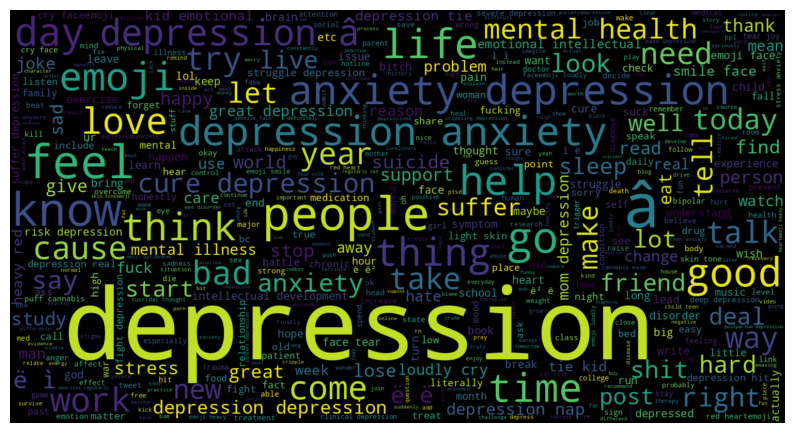

In [81]:
from wordcloud import WordCloud
text = " ".join(df[df['label (depression result)'] == 1]['lemmas_back_to_text'])
plt.figure(figsize = (10, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


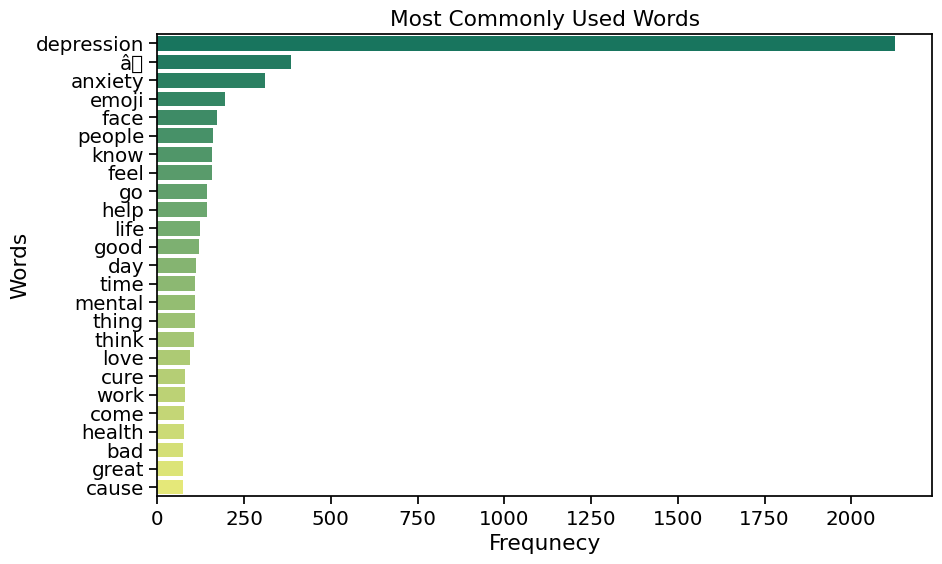

In [82]:
all_spam_words = []
for sentence in df[df['label (depression result)'] == 1]['lemmas_back_to_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df11 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(10,6))
sns.barplot(y = df11['Word'], x= df11['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

label 0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


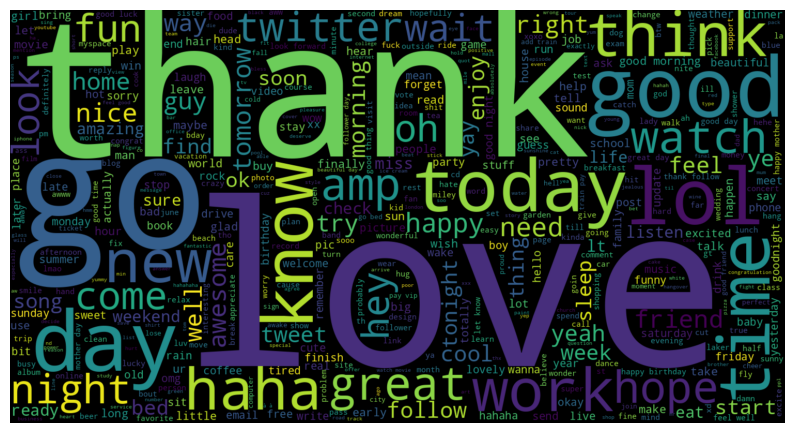

In [ ]:
from wordcloud import WordCloud
text = " ".join(df[df['label (depression result)'] == 0]['lemmas_back_to_text'])
plt.figure(figsize = (10, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


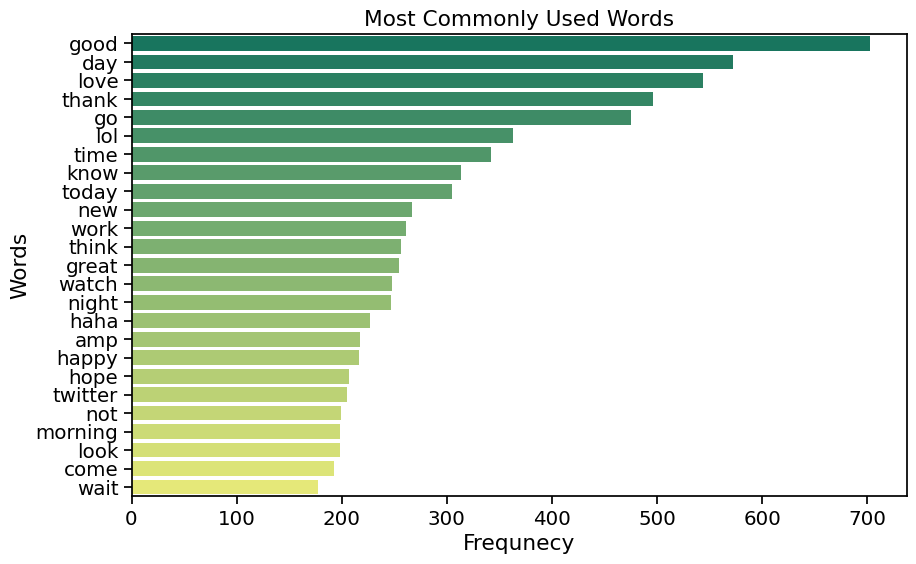

In [80]:
all_spam_words = []
for sentence in df[df['label (depression result)'] == 0]['lemmas_back_to_text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df00 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(10,6))
sns.barplot(y = df00['Word'], x= df00['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

#Top2Vec Topic Modelling Algo 1

label 1

In [83]:
docs=df1.lemmas_back_to_text.tolist()
docs[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'lack understand small significant cause anxiety depression feel incredibly lonely soooo easy compare easy invalidate'

In [84]:
from top2vec import Top2Vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
model = Top2Vec(docs)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-04-03 20:03:32,395 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-03 20:03:32,578 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-03 20:03:37,946 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-03 20:03:54,523 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-03 20:03:54,751 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [86]:
topic_sizes, topic_nums =model.get_topic_sizes()
print(topic_sizes)

[257 254 254 234 225 225 223 215 214 213]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
print(topic_nums)

[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
topic_words ,word_scores,topic_nums = model.get_topics(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
for words,scores,num in zip(topic_words , word_scores,topic_nums):
  print(num)
  print(f"Words: {words}")

0
Words: ['face' 'anxiety' 'smile' 'bad' 'real' 'look' 'cry' 'post' 'mental' 'kid'
 'love' 'life' 'know' 'come' 'tell' 'stress' 'talk' 'suffer' 'get' 'good'
 'today' 'help' 'people' 'health' 'go' 'friend' 'make' 'work' 'hard'
 'emoji' 'think' 'way' 'cure' 'struggle' 'right' 'feel' 'try' 'year'
 'depression' 'cause' 'day' 'take' 'need' 'time' 'great' 'let' 'thing']
1
Words: ['cause' 'hard' 'friend' 'love' 'take' 'real' 'today' 'kid' 'come'
 'stress' 'make' 'talk' 'suffer' 'smile' 'time' 'help' 'try' 'cry'
 'people' 'need' 'think' 'bad' 'depression' 'right' 'face' 'let' 'emoji'
 'struggle' 'good' 'work' 'health' 'get' 'way' 'anxiety' 'thing' 'day'
 'life' 'great' 'look' 'go' 'know' 'year' 'mental' 'tell' 'cure' 'post'
 'feel']
2
Words: ['post' 'hard' 'today' 'suffer' 'help' 'talk' 'let' 'mental' 'get' 'year'
 'stress' 'need' 'anxiety' 'day' 'smile' 'thing' 'depression' 'people'
 'think' 'right' 'know' 'health' 'try' 'struggle' 'make' 'go' 'time'
 'friend' 'look' 'real' 'good' 'life' 'emo

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
documents,document_scores,document_ids = model.search_documents_by_topic(topic_num=0 ,num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1000, Score: 0.29283931851387024
-----------
anxiety real depression emoji face cold sweat
-----------

Document: 285, Score: 0.2824232876300812
-----------
friend struggle app help avoid potentially harmful phrase
-----------

Document: 2127, Score: 0.26563405990600586
-----------
talk resilience recognition pain suffer normal healing process depression unique suffering recognition essential health
-----------

Document: 169, Score: 0.2644052803516388
-----------
depression live inside leave
-----------

Document: 1336, Score: 0.26331374049186707
-----------
high rate depression sexual minority youth â
-----------

Document: 2204, Score: 0.259512722492218
-----------
take nap sleep clear night lately think thank god depression emoji face tear joy
-----------

Document: 1846, Score: 0.24600322544574738
-----------
know farthis depression instead keep thing pull sheet head feck worldhad ultrasound leg happy circulation problem infection
-----------

Document: 798, Score: 0.24

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


label 0

In [91]:
docs_0=df0.lemmas_back_to_text.tolist()
docs_0[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'real good moment missssssssss'

In [92]:
from top2vec import Top2Vec

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
model = Top2Vec(docs_0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-04-03 20:07:36,343 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-04-03 20:07:37,301 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-04-03 20:08:03,742 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-04-03 20:08:39,992 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-04-03 20:08:42,109 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [94]:
topic_sizes, topic_nums =model.get_topic_sizes()
print(topic_sizes)

[1836 1674 1545 1524 1421]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
print(topic_nums)

[0 1 2 3 4]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
topic_words ,word_scores,topic_nums = model.get_topics(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
for words,scores,num in zip(topic_words , word_scores,topic_nums):
  print(num)
  print(f"Words: {words}")

0
Words: ['hope' 'later' 'maybe' 'beautiful' 'win' 'fun' 'hear' 'friend' 'home'
 'luck' 'come' 'wait' 'song' 'movie' 'buy' 'lot' 'haha' 'lol' 'say' 'hour'
 'glad' 'finish' 'hey' 'try' 'soon' 'dinner' 'go' 'oh' 'need' 'help'
 'find' 'watch' 'have' 'week' 'finally' 'morning' 'enjoy' 'use' 'check'
 'summer' 'wow' 'ok' 'miss' 'sun' 'head' 'mean' 'work' 'talk' 'world'
 'game']
1
Words: ['twitter' 'guy' 'bed' 'free' 'hope' 'morning' 'to' 'go' 'start' 'buy'
 'party' 'life' 'hear' 'bit' 'leave' 'ready' 'ur' 'beautiful' 'bad' 'yeah'
 'find' 'look' 'lot' 'sweet' 'fun' 'haha' 'lol' 'thing' 'house' 'job'
 'school' 'amazing' 'world' 'talk' 'home' 'th' 'wish' 'sure' 'get'
 'actually' 'head' 'dinner' 'way' 'wanna' 'friend' 'song' 'girl' 'sound'
 'lt' 'come']
2
Words: ['have' 'bad' 'post' 'wanna' 'home' 'th' 'follow' 'try' 'right' 'bed'
 'tweet' 'come' 'game' 'start' 'tonight' 'dinner' 'ok' 'look' 'take'
 'thank' 'play' 'let' 'pretty' 'today' 'beautiful' 'great' 'lol' 'good'
 'new' 'read' 'enjoy' 'use

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
documents,document_scores,document_ids = model.search_documents_by_topic(topic_num=0 ,num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 7936, Score: 0.23596835136413574
-----------
yes centshope have great morning
-----------

Document: 5956, Score: 0.2301270216703415
-----------
handsome guy
-----------

Document: 1074, Score: 0.22245118021965027
-----------
drink trainer brand ltlthave look
-----------

Document: 6567, Score: 0.1973336786031723
-----------
make taco
-----------

Document: 7732, Score: 0.19722652435302734
-----------
fun tonight kinda suck lay bed watch stepbrother
-----------

Document: 266, Score: 0.1941051483154297
-----------
till wait kekekeke jk
-----------

Document: 2316, Score: 0.19020868837833405
-----------
congrats fight street fight ordinary belt probably useful weapon
-----------

Document: 4974, Score: 0.185498908162117
-----------
road right mountain
-----------

Document: 6798, Score: 0.1830010861158371
-----------
swing night great hahaha swing night
-----------

Document: 2254, Score: 0.17763102054595947
-----------
robot chicken marathon let far till fall asleep fun time 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA Topic Modelling Algp 2

label 1 topics


In [101]:
# Create a id2word dictionary
id2word = Dictionary(df1['lemma_tokens'])
print(len(id2word))
     

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
     

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df1['lemma_tokens']]
     

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=10, id2word=id2word, workers=12, passes=5)
     

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
     

# Create Topics
topics = [' '.join(t[0:10]) for t in words]
     

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5820
2107
------ Topic 0 ------
depression anxiety know feel cry mental people ¦ â struggle

------ Topic 1 ------
depression â ¦ thing anxiety people think good run tell

------ Topic 2 ------
depression feel suffer help â ¦ come life know cause

------ Topic 3 ------
depression ° ë ë´ì ë´ë²ë cure ¤ëì¸ì know people bom

------ Topic 4 ------
depression ¦ â go emoji to feel face bad anxiety

------ Topic 5 ------
depression ¦ â anxiety face emoji child health man study

------ Topic 6 ------
depression know good go live life thing death work â

------ Topic 7 ------
depression anxiety ¦ â kid development u emotional mom help

------ Topic 8 ------
depression anxiety great day cure good ¦ â life love

------ Topic 9 ------
depression emoji face smile ¦ heavy â red skin feel



In [102]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.097778128250728

Coherence Score:  0.406013108691157


In [103]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000519 -0.003860       1        1  13.206595
7      0.019323 -0.111750       2        1  12.476775
2      0.029234 -0.053027       3        1  11.333613
5     -0.062316 -0.060094       4        1  11.178921
8      0.037794  0.004727       5        1  11.157385
1      0.019310 -0.040959       6        1   9.106949
9     -0.138838  0.103874       7        1   8.819438
4     -0.072238 -0.006006       8        1   8.320872
3      0.150032  0.087385       9        1   7.746434
6      0.018218  0.079709      10        1   6.653019, topic_info=        Term        Freq       Total Category  logprob  loglift
35     emoji  184.000000  184.000000  Default  30.0000  30.0000
51         ¦  365.000000  365.000000  Default  29.0000  29.0000
37      face  162.000000  162.000000  Default  28.0000  28.0000
52        â  352.000000  352.000000  Default  27.0000  27.0000
201    smile   50.000000   50.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
51         ¦    8.863109  365.093168  Topic10  -5.0719  -1.0082
0    anxiety    6.848274  281.930152  Topic10  -5.3298  -1.0076
984     skin    5.766830   35.515193  Topic10  -5.5017   0.8923
178     lose    5.673506   42.220352  Topic10  -5.5180   0.7030
614      let    5.679183   51.659969  Topic10  -5.5170   0.5022

[700 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1908      4  0.722678    access
2054      9  0.708044      ache
159       8  0.835394   achieve
195       1  0.081111  activity
195       2  0.729997  activity
...     ...       ...       ...
712       2  0.079188       â
712       6  0.316754       â
712       8  0.554319       â
2043      3  0.660849       â
2043      8  0.220283       â

[1805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 3, 6, 9, 2, 10, 5, 4, 7])

In [104]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df['lemmas_back_to_text'])
     

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             iid=True, n_jobs=1,
             param_grid={'n_topics': [10, 15, 20, 30], 
                         'learning_decay': [0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)
     

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: ignored

In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df1['lemma_tokens'], start=2, limit=200, step=6)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print(model_list_topic)

[<gensim.models.ldamulticore.LdaMulticore object at 0x7fb8801e14c0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87f1337c0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87f1d7310>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb8801f11c0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb8800b9b50>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87ff61dc0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87fec66d0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87fd75bb0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87b3ea2e0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87fd811c0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87ff10cd0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb87ff100a0>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb8b1c0c340>, <gensim.models.ldamulticore.LdaMulticore object at 0x7fb8aa6bb5b0>, <gensim.models.ldamulticore.LdaMulticore object

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
print(coherence_values_topic)

[0.3054867194469876, 0.29195803642195495, 0.3220200381111566, 0.3020127760113928, 0.31528921527459425, 0.3296693200322475, 0.34606309825184456, 0.33967959496207806, 0.3554249028280318, 0.32231645369525275, 0.32918773454010536, 0.3423459579974573, 0.34223073592357145, 0.33535747568290947, 0.3364557978701106, 0.33761195706662317, 0.31809322063669027, 0.35014400040028815, 0.3430462993609487, 0.33392588765602366, 0.3540137424436429, 0.3556405804014079, 0.362940271275975, 0.3695803400901623, 0.3521861266247808, 0.36976155031247543, 0.367809856760031, 0.36221699337963953, 0.3673075962213912, 0.3862749203147666, 0.3878076635414787, 0.4115581910376541, 0.4122635690749461]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_5_2 = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=68,
                       random_state=42,
                       chunksize=2000,
                       passes=25,
                       decay=0.5,
                       iterations=70)

label 0

In [105]:
# Create a id2word dictionary
id2word = Dictionary(df0['lemma_tokens'])
print(len(id2word))
     

# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
     

# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df0['lemma_tokens']]
     

# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)
     

# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
     

# Create Topics
topics = [' '.join(t[0:10]) for t in words]
     

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")
     

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10730
3541
------ Topic 0 ------
love go new haha know twitter time great day u

------ Topic 1 ------
day today watch lol thank look work follow know time

------ Topic 2 ------
think good night go lol yes time head take year

------ Topic 3 ------
thank not go work to home come day lol guy

------ Topic 4 ------
good day morning go love happy hope thank night time



In [106]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.614872907656382

Coherence Score:  0.2631703076619355


In [107]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.024264  0.010710       1        1  23.016869
4      0.000378  0.060629       2        1  22.556026
1      0.087961  0.038908       3        1  19.738591
3      0.012814 -0.126831       4        1  18.413335
2     -0.125417  0.016584       5        1  16.275179, topic_info=      Term        Freq       Total Category  logprob  loglift
0     good  646.000000  646.000000  Default  30.0000  30.0000
76   thank  457.000000  457.000000  Default  29.0000  29.0000
237    day  523.000000  523.000000  Default  28.0000  28.0000
71   watch  227.000000  227.000000  Default  27.0000  27.0000
135    not  183.000000  183.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
277   feel   27.740495  146.221387   Topic5  -5.4501   0.1533
143  great   31.081718  233.031138   Topic5  -5.3364  -0.1990
76   thank   35.423241  457.509856   Topic5  -5.2056  -0.7429
45    love   33.813186  494.671088   Topic5  -5.2521  -0.8675
73    haha   28.207405  207.459843   Topic5  -5.4334  -0.1798

[422 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1288      1  0.774143    accept
1288      5  0.110592    accept
242       1  0.117129  actually
242       2  0.117129  actually
242       3  0.136650  actually
...     ...       ...       ...
3024      1  0.911449         ©
3024      2  0.050636         ©
3148      1  0.242931         °
3148      3  0.048586         °
3148      5  0.680207         °

[939 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])